In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette


In [2]:
# config_file = 'configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
# checkpoint_file = 'checkpoints/deeplabv3_r50-d8_512x1024_40k_cityscapes_20200605_022449-acadc2f8.pth'

# config_file = 'configs/deeplabv3/deeplabv3_r50-d8_512x512_4x4_160k_coco-stuff164k.py'
# checkpoint_file = 'checkpoints/deeplabv3_r50-d8_512x512_4x4_160k_coco-stuff164k_20210709_163016-49f2812b.pth'

# config_file = 'configs/deeplabv3/deeplabv3_r50-d8_512x512_160k_ade20k.py'
# checkpoint_file = 'checkpoints/deeplabv3_r50-d8_512x512_160k_ade20k_20200615_123227-5d0ee427.pth'

config_file = 'configs/deeplabv3plus/deeplabv3plus_r101-d8_512x512_80k_ade20k.py' 
checkpoint_file = 'checkpoints/deeplabv3plus_r101-d8_512x512_160k_ade20k_20200615_123232-38ed86bb.pth'


In [3]:
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

Use load_from_local loader


/home/ManjushaRoyChoudhury/code/mmsegmentation/mmseg/models/segmentors/base.py:264: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


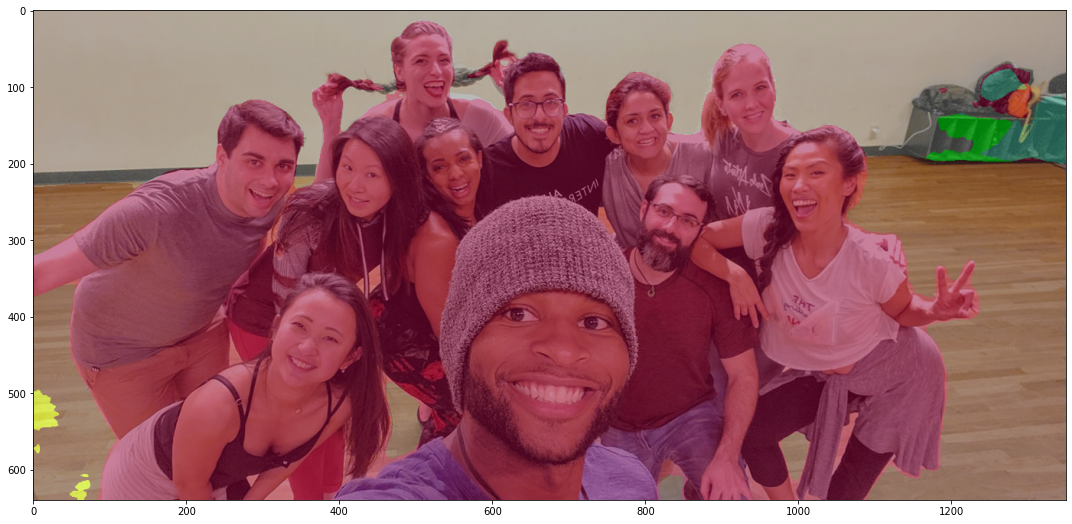

In [39]:
img_path = '/home/manjusharoychoudhury/code/mmsegmentation/manjusha_dl_images/groupphoto.png'
result = inference_segmentor(model, img_path)
seg_image = show_result_pyplot(model, img_path, result, get_palette('ade'))

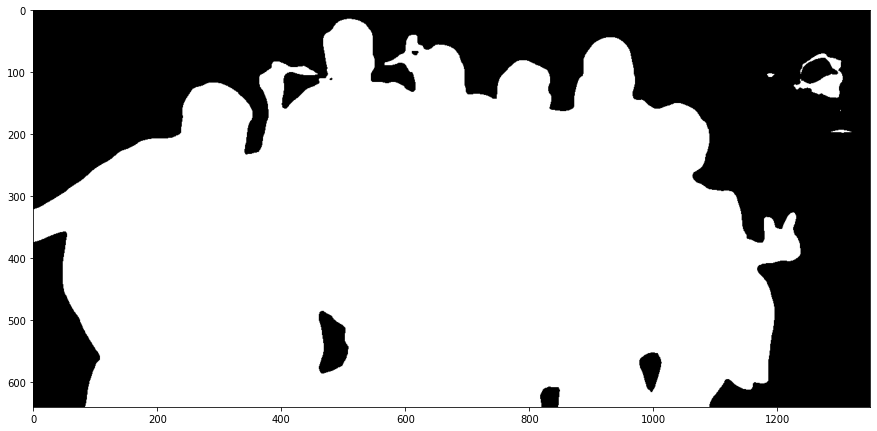

In [40]:
import numpy as np
mask_viz = np.zeros_like(result[0])
mask_viz[result[0]==12] = 255
mask_viz = np.dstack((mask_viz, mask_viz, mask_viz))
import matplotlib.pyplot as plt
fig_size=(15, 10)
plt.figure(figsize=fig_size)
plt.imshow(mask_viz, cmap='gray')

In [41]:
fg_mask = np.zeros_like(result[0])
fg_mask[result[0]==12] = 1
fg_mask = np.dstack((fg_mask, fg_mask, fg_mask))

In [50]:
import imageio
fg_image = imageio.imread(img_path)[:,:,:3]
print(fg_image.shape)
bg_image_path = '/home/ManjushaRoyChoudhury/code/mmsegmentation/manjusha_dl_images/pyramids.png'
bg_image = imageio.imread(bg_image_path)

print(fg_image.shape)
print(bg_image.shape)

(640, 1350, 3)
(640, 1350, 3)
(1109, 2048, 3)


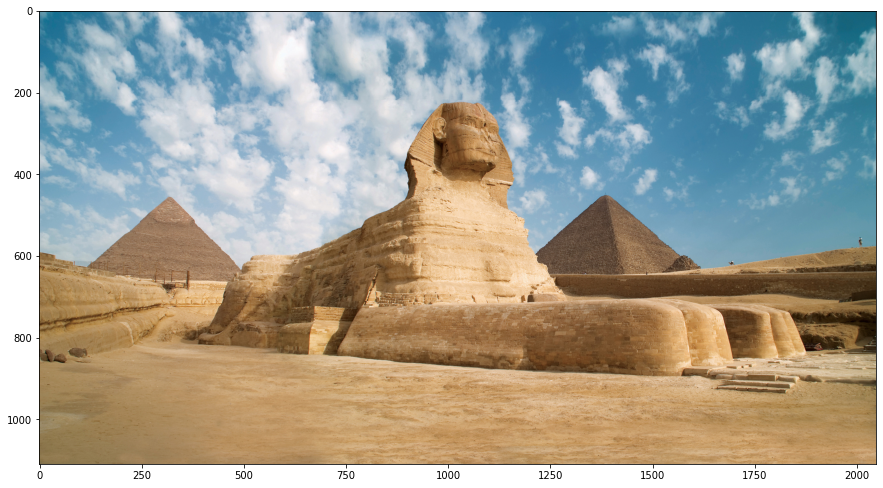

In [51]:
fig_size=(15, 10)
plt.figure(figsize=fig_size)
plt.imshow(bg_image)

### Downsize fg_image and mask

In [62]:
from skimage.transform import resize
import cv2

downsize_factor = 1

# using different resize functions because skimage resize somehow not generating a good downsized mask image
# fg_small = cv2.resize(fg_image, dsize=(int(fg_image.shape[1]/4), int(fg_image.shape[0]/4)), interpolation=cv2.INTER_NEAREST)
fg_small = resize(fg_image, (int(fg_image.shape[0]/downsize_factor), int(fg_image.shape[1]/downsize_factor)))
fg_mask_small = cv2.resize(fg_mask, dsize=(int(fg_image.shape[1]/downsize_factor), int(fg_image.shape[0]/downsize_factor)), interpolation=cv2.INTER_NEAREST)
# fig_size=(15, 10)
# plt.figure(figsize=fig_size)
# plt.imshow(fg_small)
# plt.show()

# plt.figure(figsize=fig_size)
# plt.imshow(mask_small*255)
# plt.show()

### create larger mask of same size as bg image

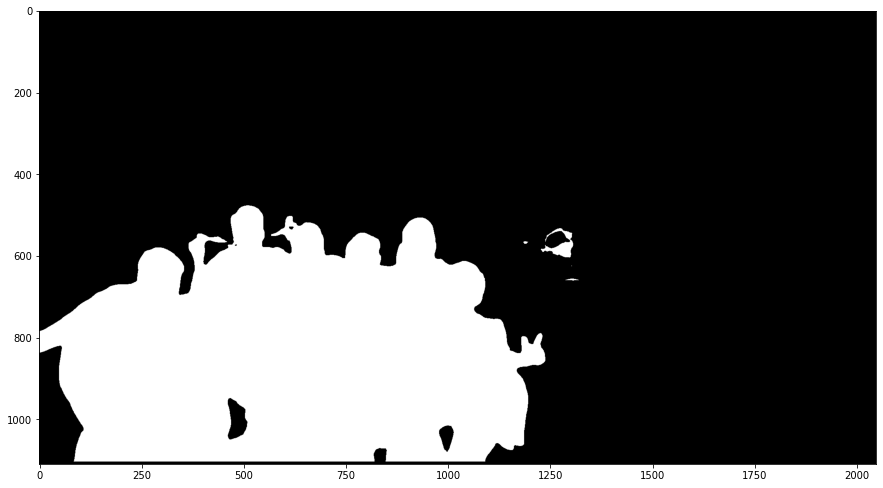

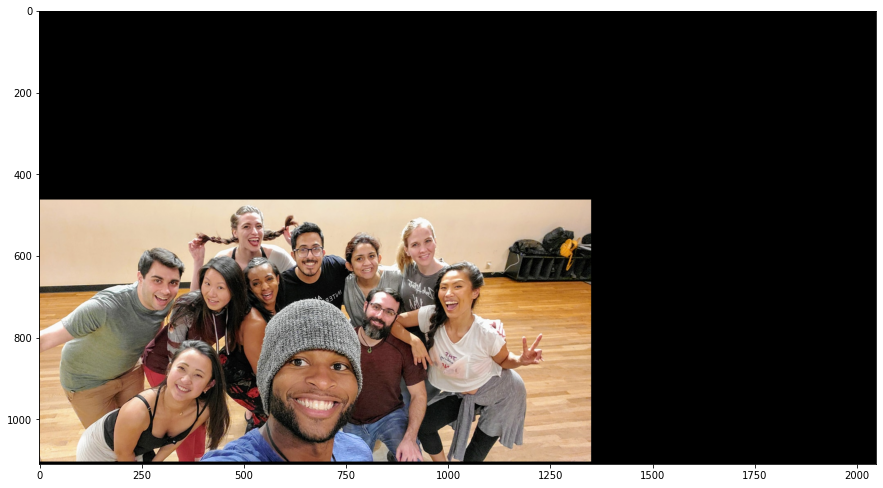

In [71]:
# TODO: we can randomize start_row and start_col
start_row = 463
start_col = 1

#create a mask of the same size as the destination image and add the fg_mask on to it
mask = np.zeros_like(bg_image)
mask[start_row:start_row+fg_mask_small.shape[0], start_col:start_col+fg_mask_small.shape[1], :] += fg_mask_small.astype(np.uint8)

plt.figure(figsize=fig_size)
plt.imshow(mask*255)
plt.show()

mask_color = np.zeros_like(bg_image)
mask_color[start_row:start_row+fg_mask_small.shape[0], start_col:start_col+fg_mask_small.shape[1], :] = (fg_small*255).astype(np.uint8)

plt.figure(figsize=fig_size)
plt.imshow(mask_color)
plt.show()


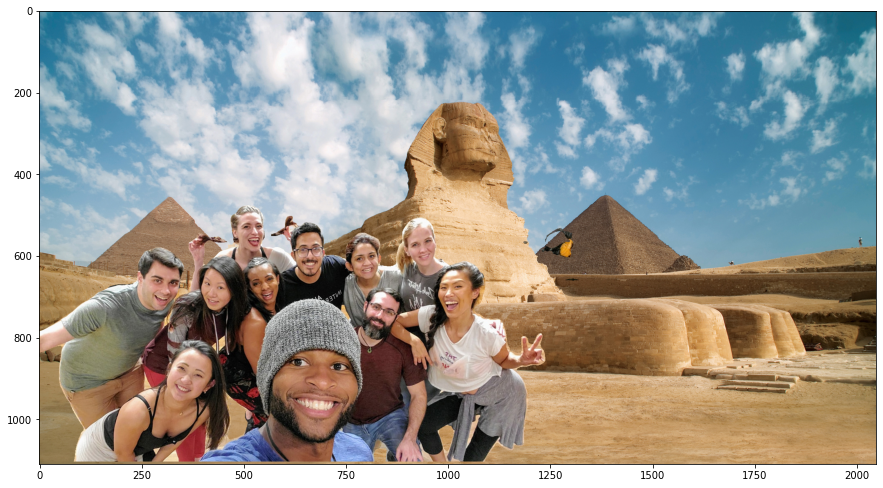

In [72]:
mask_binary = mask == 1

# reload bg_image to clear the palette
bg_image = imageio.imread(bg_image_path)
bg_image[mask_binary] = mask_color[mask_binary]
plt.figure(figsize=fig_size)
plt.imshow(bg_image)
plt.show()